Promlem 1 - a -
Minimization using numericak calculations

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [1]:
# Define variables
x1, x2, x3 = sp.symbols('x1 x2 x3')

# Define the objective function
f = 5*x1**2 + x2**2 + 2*x3**2 + 4*x1*x2 - 14*x1 - 6*x2 + 20

# Calculate the gradient
gradient = [sp.diff(f, x1), sp.diff(f, x2), sp.diff(f, x3)]

# Calculate the Hessian matrix
Hessian = sp.hessian(f, (x1, x2, x3))

# Solve for points where gradient is zero
gradient_zero_points = sp.solve(gradient, (x1, x2, x3))
grad_x1_0 = int(gradient_zero_points[x1])
grad_x2_0 = int(gradient_zero_points[x2])
grad_x3_0 = int(gradient_zero_points[x3])

# Solve f at critical point
f_min = 5*grad_x1_0**2 + grad_x2_0**2 + 2*grad_x3_0**2 + 4*grad_x1_0*grad_x2_0 - 14*grad_x1_0 - 6*grad_x2_0 + 20

print("Gradient of f(x):", gradient)
print("Hessian matrix of f(x):", Hessian)
print("Points where gradient is zero:", gradient_zero_points)
print("Minimum value of objective function:", f_min)

Gradient of f(x): [10*x1 + 4*x2 - 14, 4*x1 + 2*x2 - 6, 4*x3]
Hessian matrix of f(x): Matrix([[10, 4, 0], [4, 2, 0], [0, 0, 4]])
Points where gradient is zero: {x1: 1, x2: 1, x3: 0}
Minimum value of objective function: 10


Promlem 1 - b -
Minimization using steepest descent

In [3]:
def f(x1, x2, x3):
    return 5*x1**2 + x2**2 + 2*x3**2 + 4*x1*x2 - 14*x1 - 6*x2 + 20

def gradient_f(x1, x2, x3):
    df_dx1 = 10*x1 + 4*x2 - 14
    df_dx2 = 4*x1 + 2*x2 - 6
    df_dx3 = 4*x3
    return np.array([df_dx1, df_dx2, df_dx3])

(b.1) minimization rule

In [13]:
def steepest_descent(i,initial_point, epsilon,iterations,cost):
    x1, x2, x3 = initial_point
    gradient = gradient_f(x1, x2, x3)
    d = [-gradient[0],-gradient[1],-gradient[2]]
    # print(i,x1,x2,x3,alpha,f(x1, x2, x3))
    iterations.append(i)
    cost.append(f(x1, x2, x3))
    while True:
        i +=1
        gradient = gradient_f(x1, x2, x3)
        d = [-gradient[0],-gradient[1],-gradient[2]]
        alpha = ((-10*x1*d[0]-4*x2*d[0]+14*d[0]-4*x1*d[1]-2*x2*d[1]+6*d[1]-4*x3*d[2])/(2*(5*d[0]**2 + d[1]**2 + 4*d[0]*d[1]+4*d[2]**2)))
        if np.linalg.norm(gradient) < epsilon:
            break
        x1 -= alpha * gradient[0]
        x2 -= alpha * gradient[1]
        x3 -= alpha * gradient[2]
        # print(i,x1,x2,x3,alpha,f(x1, x2, x3))
        iterations.append(i)
        cost.append(f(x1, x2, x3))
    return x1, x2, x3

iterations = []
cost = []
i = 1
initial_point = [0, 10, 0]  # Initial guess
epsilon = 1e-6  # Convergence threshold

min_point = steepest_descent(i,initial_point, epsilon,iterations,cost)
print("Minimum point:", min_point)
print("cost evaluated at minimum point:", f(*min_point))

# print(len(iterations),'i', iterations)
# print(len(cost),'cost',cost)

Minimum point: (0.9999993941362655, 1.0000014504010613, 0.0)
cost evaluated at minimum point: 10.000000000000425


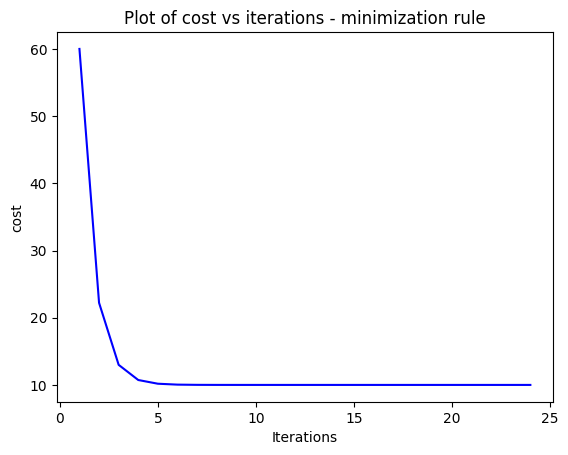

In [14]:
plt.plot(iterations, cost, color='blue', linestyle='-')

plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Plot of cost vs iterations - minimization rule')
plt.show()

(b.2) bisection rule

In [42]:
def alpha_bisection (x1,x2,x3,d,a1,a2):
    x = np.array([x1,x2,x3])
    d = np.array(d)
    alpha_min = a1
    alpha_max = a2
    alpha_mid = (alpha_min + alpha_max)/2
    
    imp = x+alpha_mid*d
    h = np.dot(np.transpose(gradient_f(imp[0], imp[1], imp[2])),d)
    if (abs(h) < 10**(-6)) or (alpha_min == alpha_max):
        return np.array([alpha_mid])
    elif h> 0:
        return alpha_bisection(x1,x2,x3,d,alpha_min, alpha_mid)
    else:
        return alpha_bisection(x1,x2,x3,d,alpha_mid, alpha_max)
    
def steepest_descent(i,initial_point,a1,a2,epsilon,iterations,cost):
    x1, x2, x3 = initial_point
    gradient = gradient_f(x1, x2, x3)
    d = [-gradient[0],-gradient[1],-gradient[2]]
    iterations.append(i)
    cost.append(f(x1, x2, x3))
    while True:
        i +=1
        gradient = gradient_f(x1, x2, x3)
        d = [-gradient[0],-gradient[1],-gradient[2]]
        alpha = alpha_bisection (x1,x2,x3,d,a1,a2)
        if np.linalg.norm(gradient) < epsilon:
            break
        x1 -= alpha * gradient[0]
        x2 -= alpha * gradient[1]
        x3 -= alpha * gradient[2]
        iterations.append(i)
        cost.append(f(x1, x2, x3)[0])
    return x1, x2, x3

iterations = []
cost = []
i = 1
initial_point = [0, 10, 0]  # Initial guess
epsilon = 0.01  # Convergence threshold
a1 = 0
a2 = 1

min_point = steepest_descent(i,initial_point,a1,a2, epsilon,iterations,cost)
print("Minimum point:", min_point)
print("cost evaluated at minimum point:", f(*min_point))

# print(len(iterations),'i', iterations)
# print(len(cost),'cost',cost)

Minimum point: (array([0.99086667]), array([1.02096317]), array([0.]))
cost evaluated at minimum point: [10.00009069]


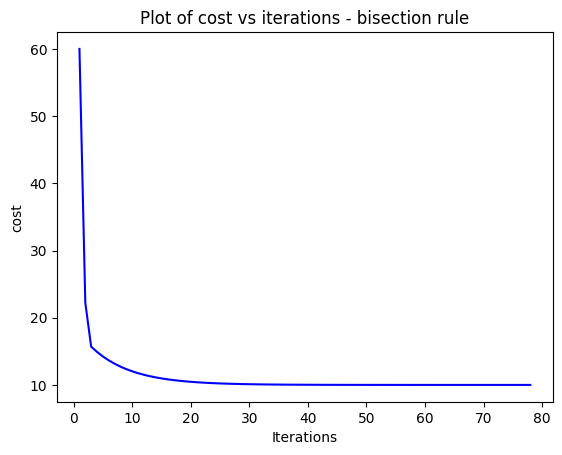

In [43]:
plt.plot(iterations, cost, color='blue', linestyle='-')

plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Plot of cost vs iterations - bisection rule')
plt.show()

(b.3) constant step size

In [59]:
def steepest_descent(i,initial_point, epsilon,iterations,cost):
    x1, x2, x3 = initial_point
    gradient = gradient_f(x1, x2, x3)
    d = [-gradient[0],-gradient[1],-gradient[2]]
    iterations.append(i)
    cost.append(f(x1, x2, x3))
    while True:
        alpha = 1/(i+5)
        i +=1
        gradient = gradient_f(x1, x2, x3)
        d = [-gradient[0],-gradient[1],-gradient[2]]

        if np.linalg.norm(gradient) < epsilon:
            break
        x1 += alpha * d[0]
        x2 += alpha * d[1]
        x3 += alpha * d[2]
        iterations.append(i)
        cost.append(f(x1, x2, x3))
    return x1, x2, x3

iterations = []
cost = []
i = 1
initial_point = [0, 10, 0]  # Initial guess
epsilon = 0.1  # Convergence threshold

min_point = steepest_descent(i,initial_point, epsilon,iterations,cost)
print("Minimum point:", min_point)
print("cost evaluated at minimum point:", f(*min_point))

# print(len(iterations),'i', iterations)
# print(len(cost),'cost',cost)

Minimum point: (0.8884781147285384, 1.2692376479237824, 0.0)
cost evaluated at minimum point: 10.01457100520198


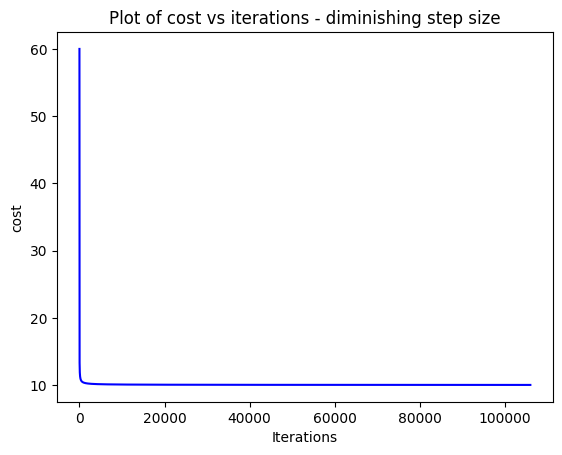

In [60]:
plt.plot(iterations, cost, color='blue', linestyle='-')

plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Plot of cost vs iterations - diminishing step size')
plt.show()

(b.4) constant step size

In [31]:
def steepest_descent(i,initial_point, alpha, epsilon,iterations,cost):
    x1, x2, x3 = initial_point
    gradient = gradient_f(x1, x2, x3)
    # print(i,x1,x2,x3,alpha,f(x1, x2, x3))
    iterations.append(i)
    cost.append(f(x1, x2, x3))
    while True:
        i +=1
        gradient = gradient_f(x1, x2, x3)
        if np.linalg.norm(gradient) < epsilon:
            break
        x1 -= alpha * gradient[0]
        x2 -= alpha * gradient[1]
        x3 -= alpha * gradient[2]
        # print(i,x1,x2,x3,alpha,f(x1, x2, x3))
        iterations.append(i)
        cost.append(f(x1, x2, x3))
    return x1, x2, x3

iterations = []
cost = []
i = 1
initial_point = [0, 0, 0]  # Initial guess
alpha = 0.162  # Step size
epsilon = 1e-6  # Convergence threshold
min_point = steepest_descent(i,initial_point, alpha, epsilon,iterations,cost)
print("Minimum point:", min_point)
print("cost evaluated at minimum point:", f(*min_point))

# print(len(iterations),'i', iterations)
# print(len(cost),'cost',cost)

Minimum point: (1.000001060329576, 0.9999974401766817, 0.0)
cost evaluated at minimum point: 10.000000000001316


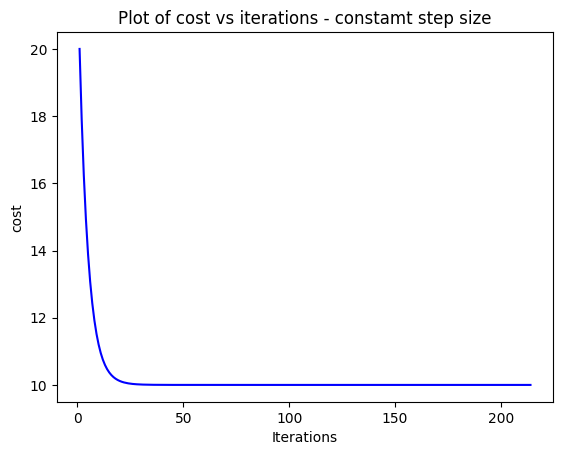

In [32]:
plt.plot(iterations, cost, color='blue', linestyle='-')

plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Plot of cost vs iterations - constamt step size')
plt.show()